<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/vannskade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Leses lokale filer

In [4]:
from google.colab import files
uploaded = files.upload()

Saving naturskade_ikke_pool.xlsx to naturskade_ikke_pool.xlsx
Saving vannskade_frost.xlsx to vannskade_frost.xlsx
Saving vannskade_frost_alle.xlsx to vannskade_frost_alle.xlsx
Saving vannskade_inntregning.xlsx to vannskade_inntregning.xlsx
Saving vannskade_inntrengnin_alle.xlsx to vannskade_inntrengnin_alle.xlsx
Saving vannskade_kjent.xlsx to vannskade_kjent.xlsx
Saving vannskade_lekkasje.xlsx to vannskade_lekkasje.xlsx
Saving vannskade_tilstopp_alle.xlsx to vannskade_tilstopp_alle.xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping.xlsx
Saving vannskade_ukjent.xlsx to vannskade_ukjent.xlsx


Enkel lineær regresjon


In [14]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

Hente data fra importerte filer

In [15]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)
frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_inntregning.xlsx',header=None,skiprows=3,names=navn)
nat = pd.read_excel('naturskade_ikke_pool.xlsx',header=None,skiprows=3,names=navn)
      
data_frost = []; data_til = []; data_inn = []; data_nat = [];
        
for i in år[:-9]:
    frost1 = frost.loc[frost['år']==i,'skade'].sum()
    tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
    intre1 = intre.loc[intre['år']==i,'skade'].sum()
    nat1 = nat.loc[nat['år']==i,'skade'].sum()
    data_frost.append(frost1)
    data_til.append(tilstopp1)
    data_inn.append(intre1)
    data_nat.append(nat1)
#løse problem med aksenavn, multipliser alle verdier med faktor
new_frost = np.array([i*(10**(-6)) for i in data_frost])
new_til = np.array([i*(10**(-6)) for i in data_til])
new_inn = np.array([i*(10**(-6)) for i in data_inn])
new_nat = np.array([i*(10**(-6)) for i in data_nat])

Plotte data

In [21]:
b

1.011138196060609

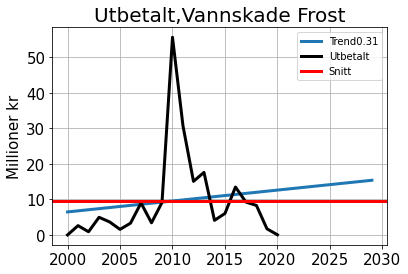

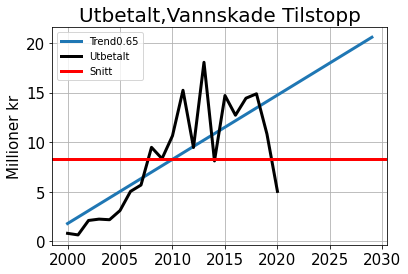

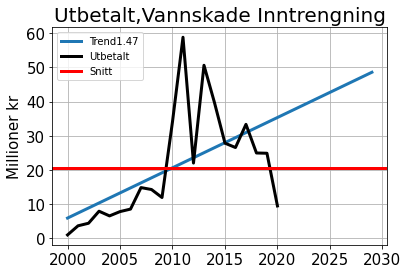

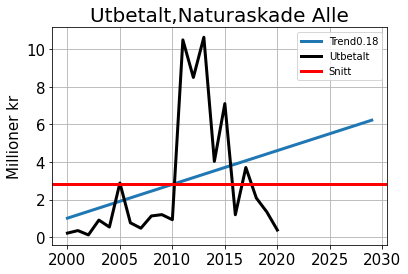

Text(0.17968101501298672, 1.011138196060609, 'trend')

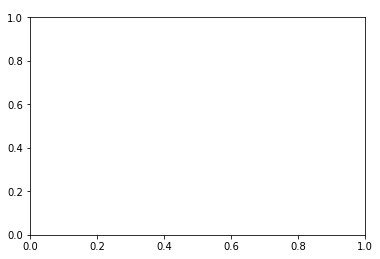

In [37]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])#.astype(np.float)\n",
data_new = np.array([new_frost,new_til,new_inn,new_nat])
tit = np.array(['Vannskade Frost','Vannskade Tilstopp','Vannskade Inntrengning',
                        'Naturaskade Alle'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, ax = plt.subplots()#, figsize=(10,10))\n",
bins = np.linspace(0,50,10)
for i,j in zip(data_new,tit):
  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  trendline=[a*index + b for index in range(len(år))]
  trend=round(a,2)
  plt.plot(år,trendline,label="Trend"+str(trend),linewidth=3)
  plt.plot(år[:-9],i,label="Utbetalt",color='k',linewidth=3)
  plt.axhline(y=snitt,color='r',label='Snitt',linewidth=3)
  plt.title("Utbetalt,"+str(j),size=20)
  plt.ylabel("Millioner kr",size=15)
  ax = plt.gca()
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  plt.grid(),plt.legend()
  #from google.colab import files\n",
  #plt.savefig(\"vannskade\"+str(j)+\".png\")\n",
  #files.download(\"vannskade\"+str(j)+\".png\")\n",
  plt.show()

Enkelt kakediagram for vannskader

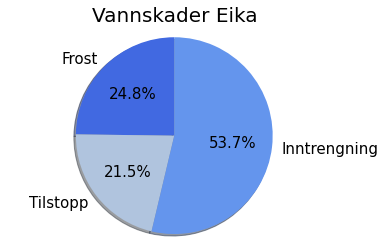

In [6]:
snitt1 = np.mean(data_frost); snitt2 = np.mean(data_til)
snitt3 = np.mean(data_inn); snitt4 = np.mean(data_nat)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:\n",
labels = 'Frost', 'Tilstopp', 'Inntrengning'#, 'Nat.skade ikke pool'\n",
sizes = [snitt1,snitt2,snitt3]#,snitt4]\n",
explode = (0, 0, 0)#, 0)  # only \"explode\" the 2nd slice (i.e. 'Hogs')\n",
colors = ['royalblue','lightsteelblue','cornflowerblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90,textprops={'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n",
ax1.set_title('Vannskader Eika',size=20)
#from google.colab import files\n",
#uploaded = files.upload()"
#plt.savefig(\"vannskade_kake.png\")\n",
#files.download(\"vannskade_kake.png\")\n",
plt.show()

Barplot for å sjekke alle vannskader størrelse 

In [17]:
lek = pd.read_excel('vannskade_lekkasje.xlsx',header=None,skiprows=3,names=navn)
kjent = pd.read_excel('vannskade_kjent.xlsx',header=None,skiprows=3,names=navn)
ukjent= pd.read_excel('vannskade_ukjent.xlsx',header=None,skiprows=3,names=navn)

data_lek = []; data_kjent = []; data_ukjent = [];

for i in år[:-9]:
  lek1 = lek.loc[lek['år']==i,'skade'].sum()
  kjent1 = kjent.loc[kjent['år']==i,'skade'].sum()
  ukjent1 = ukjent.loc[ukjent['år']==i,'skade'].sum()
  data_lek.append(lek1)
  data_kjent.append(kjent1)
  data_ukjent.append(ukjent1)
#løse problem med aksenavn, multipliser alle verdier med faktor\n",
new_lek = np.array([i*(10**(-6)) for i in data_lek])
new_kjent = np.array([i*(10**(-6)) for i in data_kjent])
new_ukjent = np.array([i*(10**(-6)) for i in data_ukjent])

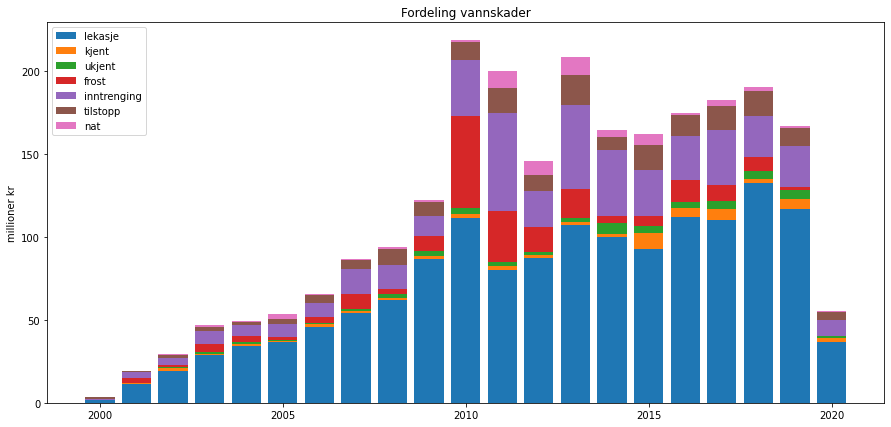

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(år[:-9], new_lek, label='lekasje')
ax.bar(år[:-9], new_kjent,bottom=new_lek, label='kjent')
ax.bar(år[:-9], new_ukjent, bottom= new_lek+new_kjent, label='ukjent')
ax.bar(år[:-9], new_frost, bottom=new_lek+new_kjent+new_ukjent, label='frost')
ax.bar(år[:-9], new_inn,bottom=new_lek+new_kjent+new_ukjent+new_frost, label='inntrenging')
ax.bar(år[:-9], new_til, bottom=new_lek+new_kjent+new_ukjent+new_frost+new_inn, label='tilstopp')
ax.bar(år[:-9], new_nat, bottom=new_lek+new_kjent+new_ukjent+new_frost+new_inn+new_til, label='nat')

ax.set_ylabel('millioner kr')
ax.set_title('Fordeling vannskader')
ax.legend() ;plt.show()

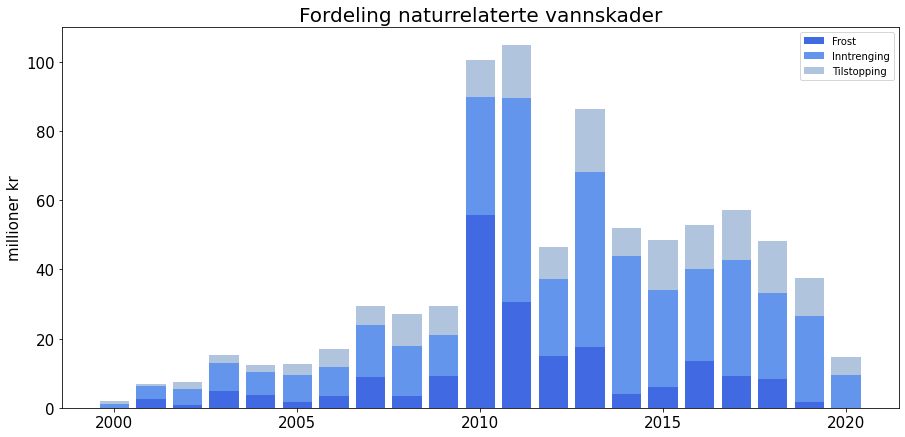

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
names = ['år','mnd','skade']
frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=names)
bar=ax.bar(år[:-9], new_frost,color='royalblue', label='Frost')
bar=ax.bar(år[:-9], new_inn,bottom=new_frost,color='cornflowerblue', label='Inntrenging')
bar=ax.bar(år[:-9], new_til, bottom= new_frost+new_inn,color='lightsteelblue', label='Tilstopping')
ax.tick_params(axis='both',labelsize=15)
ax.set_ylabel('millioner kr', size=15)
ax.set_title('Fordeling naturrelaterte vannskader', size=20)
ax.legend();

#plt.savefig(\"vannskade_hist.png\",bbox_inches = 'tight')\n",
#files.download(\"vannskade_hist.png\")\n",
plt.show()

In [10]:
kol = ['fylke','skade','år']

frost = pd.read_excel('vannskade_frost_alle.xlsx',header=None,skiprows=3,names=kol)
tilstopp = pd.read_excel('vannskade_tilstopp_alle.xlsx',header=None,skiprows=3,names=kol)
intre = pd.read_excel('vannskade_inntrengnin_alle.xlsx',header=None,skiprows=3,names=kol)

In [11]:
dfrost = []; dinn = []; dtil = []; 
fylker = ['Østfold','Akershus','Oslo','Hedmark', 'Oppland','Buskerud', 'Vestfold',
          'Telemark', 'Aust-Agder','Vest-Agder','Rogaland','Hordaland',
          'Sogn og Fjordane','Møre og Romsdal', 'Trøndelag', 'Nordland',
            'Troms fylke', 'Finnmark Finnmárku']
for i in fylker:
  frost1 = frost.loc[frost['fylke']==i,'skade'].sum()
  til1 = tilstopp.loc[tilstopp['fylke']==i,'skade'].sum()
  inn1 = intre.loc[intre['fylke']==i,'skade'].sum()
  dfrost.append(frost1)
  dtil.append(til1)
  dinn.append(inn1)

#løse problem med aksenavn, multipliser alle verdier med fakto
nfrost = np.array([i*(10**(-6)) for i in dfrost])
ntil = np.array([i*(10**(-6)) for i in dtil])
ninn = np.array([i*(10**(-6)) for i in dinn])

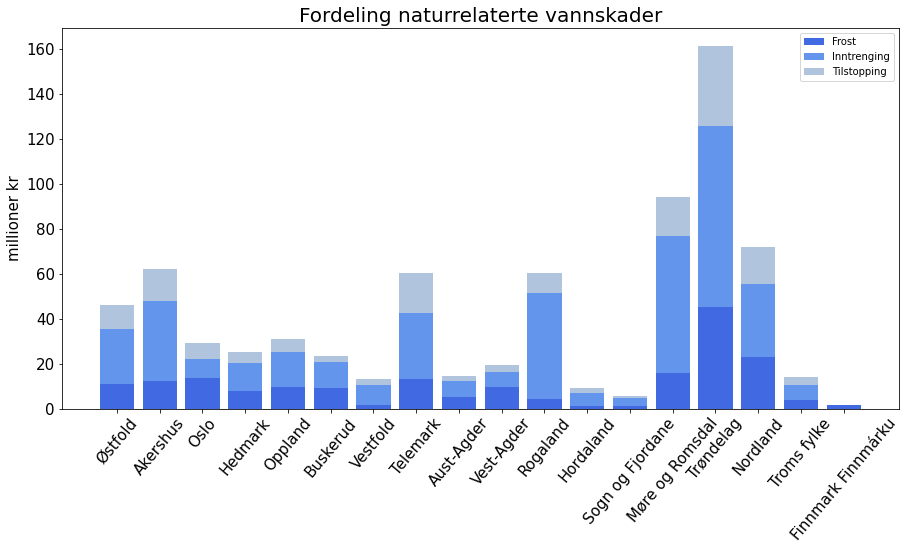

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))

bar=ax.bar(fylker, nfrost,color='royalblue', label='Frost')
bar=ax.bar(fylker, ninn,bottom=nfrost,color='cornflowerblue', label='Inntrenging')
bar=ax.bar(fylker, ntil, bottom= nfrost+ninn,color='lightsteelblue', label='Tilstopping')

ax.tick_params(axis='x',rotation=50,labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('millioner kr',size=15)
ax.set_title('Fordeling naturrelaterte vannskader',size=20)
ax.legend();

#plt.savefig("vannskade_fylke.png",bbox_inches = 'tight')
#files.download("vannskade_fylke.png")
plt.show()